# HW3 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 6/12 (Tues)  11:59 AM [Before Class Start]

## Notice Class schedule
<table>
  <tr>
    <th>Date</th>
    <th>Desc.</th>
  <tr>
    <td>5/29</td>
    <td>MID-TERM EXAM & HW#3 Start Date</td>
  </tr>
  <tr>
    <td>5/31</td>
    <td>HW#2 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/12</td>
    <td>HW#3 Due Date & HW#4(Project) Start Date</td>
  </tr>
  <tr>
    <td>6/19</td>
    <td>HW#3 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/21</td>
    <td>FINAL EXAM(NOT FIXED)</td>
  </tr>
  <tr>
    <td>6/26</td>
    <td>HW#4(Project) Due Date(NO LATE HAND-IN)</td>
  </tr>
</table>

## Assignment Credit

### Your assignments are 30% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 7%__
- __HW#3: 8%__
- __HW#4(Project): 10%__

## Python Assingment HW3 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2010-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Problem 1-1 Applying the linear regression model of scikit-learn to our data
- Information about the various model api is available at the following url:<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;http://scikit-learn.org/stable/modules/classes.html
- Apply regression model for 2000-2015 data only.
- You should use same datasets in HW#2[infant mortality rate and GDP]
- xData : GDP per capita
- yData : Infant morality rate 
- Please print __MSE__ of implemented model.

In [10]:
#load data and filtering data (2000-2015) you can use HW#2 preprocessing code
###YOUR CODE HERE###
tsv = pd.read_csv('GDPperCapByTab.txt',sep='\t',index_col=0) 

tsv1=tsv.iloc[:,4:-1]
tsv1=tsv1.replace({'n/a':np.nan})

for rowNum in range(0,len(tsv1.index)):
    for columnNum in range(0,len(tsv1.columns)):
        if(type(tsv1.iloc[rowNum,columnNum])==str):
            tsv1.iloc[rowNum,columnNum]=tsv1.iloc[rowNum,columnNum].replace(',','')
                         
tsv1=tsv1.astype('float')

for row in tsv1.index:
    for col in tsv1.columns:
        if(np.isnan(tsv1.loc[row,col])==True):
            tsv1=tsv1.drop(row)
            break
resulttsv=tsv1.copy()

lst=pd.DataFrame.empty

for i in range(1980,2015,5):
    lst=resulttsv.loc[:,str(i):str(i+5)].median(axis=1)
    resulttsv[str(i)+'-'+str(i+5)]=lst
    
resulttsv=resulttsv.iloc[:,-3:].astype(int)

print(resulttsv.head())

IMtsv = pd.read_csv('InfantMortalityByTab.txt',sep='\t',index_col=0)
IMtsv=IMtsv.iloc[:,-3:]

print(IMtsv.head())


                     2000-2005  2005-2010  2010-2015
Country                                             
Albania                   1635       3846       4331
Algeria                   1967       3936       5444
Angola                     726       3138       4578
Antigua and Barbuda      10531      14199      13776
Argentina                 4738       7826      13549
             2000-2005  2005-2010  2010-2015
Afghanistan      89.53      79.51      71.12
Albania          20.25      16.11      14.42
Algeria          37.45      34.18      30.28
Angola          116.05     104.35      96.22
Argentina        15.04      14.61      13.69


In [37]:
lr = LinearRegression()

xData=[]
yData=[]

#TODO
DroppedIMtsv=IMtsv.copy()
for idx in IMtsv.index:
    if idx not in resulttsv.index:
        DroppedIMtsv=DroppedIMtsv.drop(idx)

Droppedresulttsv=resulttsv.copy()
for idx in Droppedresulttsv.index:
    if idx not in DroppedIMtsv.index:
        Droppedresulttsv=Droppedresulttsv.drop(idx)
        
for years in DroppedIMtsv.columns:   
    xData=Droppedresulttsv[years]
    yData=DroppedIMtsv[years]

xData = np.array(xData)
xData = xData[:, np.newaxis]
yData = np.array(yData)
yData = yData[:, np.newaxis]    
 
lr.fit(xData, yData)
print ("MSE - scikit learn linear regression: ", mean_squared_error(lr.predict(xData), yData))

MSE - scikit learn linear regression:  453.348376104


### Problem 1-2 Expanded to polynomial regression
- Let's look at the performance change by changing the degree in 0-9.
- Normalization should also be followed.

*hint: You can use an additional API to implement the polynomial regression model.*

In [45]:
#TODO: import api(s) to implement the polynomial regression model

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import pipeline

for deg in range(10):
    PolynomialRegression = pipeline.make_pipeline(PolynomialFeatures(deg), Ridge())
    plr = PolynomialRegression.fit(xData, yData)
    print ("MSE - poly-linear regression; degree=", deg,": ", mean_squared_error(plr.predict(xData), yData))

MSE - poly-linear regression; degree= 0 :  660.58725741
MSE - poly-linear regression; degree= 1 :  453.348376104
MSE - poly-linear regression; degree= 2 :  368.70433402
MSE - poly-linear regression; degree= 3 :  310.71989614
MSE - poly-linear regression; degree= 4 :  280.898161572
MSE - poly-linear regression; degree= 5 :  249.448624021
MSE - poly-linear regression; degree= 6 :  234.497010071
MSE - poly-linear regression; degree= 7 :  228.794450849
MSE - poly-linear regression; degree= 8 :  227.370197481
MSE - poly-linear regression; degree= 9 :  226.623121851


### Problem 1-3 The change in performance according to the degree can be confirmed. Is performance improvement reliable? Describe the problem of current method.

### YOUR ANSWER HERE ###



모든 데이터를 훈련시키는데 사용하므로 overfitting 나는지 확인하기 어렵다. 즉 일반적인 경우에도 잘 작동할지 알 수 없다.

### Problem 1-4 To solve the problem mentioned above, you must divide the train set and the test set. Try experimenting by assigning 20% of the total sample to a test set.
- Please print MSEs of implemented model, for both of training and test set.
- Degree is the same as the previous experiment, 0-9.

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [47]:
#TODO: import API for deviding training and test set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(xData, yData, test_size=0.2, random_state=42)

for deg in range(10):
    PolynomialRegression = pipeline.make_pipeline(PolynomialFeatures(deg), Ridge())

    plr = PolynomialRegression.fit(x_train, y_train)
    print ("MSE - sklearn poly-linear regression; degree=", deg,"\n\ttrain: ", mean_squared_error(plr.predict(x_train), y_train), ",\tval: ", mean_squared_error(plr.predict(x_val), y_val))

MSE - sklearn poly-linear regression; degree= 0 
	train:  715.614028209 ,	val:  444.876883067
MSE - sklearn poly-linear regression; degree= 1 
	train:  494.102243725 ,	val:  295.612749619
MSE - sklearn poly-linear regression; degree= 2 
	train:  398.454127276 ,	val:  257.729913793
MSE - sklearn poly-linear regression; degree= 3 
	train:  325.226625739 ,	val:  270.680406145
MSE - sklearn poly-linear regression; degree= 4 
	train:  291.345192458 ,	val:  250.681329932
MSE - sklearn poly-linear regression; degree= 5 
	train:  252.268911036 ,	val:  258.544639745
MSE - sklearn poly-linear regression; degree= 6 
	train:  236.904156882 ,	val:  259.871764238
MSE - sklearn poly-linear regression; degree= 7 
	train:  236.392044287 ,	val:  214.74547525
MSE - sklearn poly-linear regression; degree= 8 
	train:  236.246997551 ,	val:  219.705676323
MSE - sklearn poly-linear regression; degree= 9 
	train:  235.853491723 ,	val:  247.594852464


### Problem 1-5 We currently use only one feature called GDP per capita. If you want to improve performance, you will need to add features. Present other valid features and describe why you think so. 
- You only need to collect the URL. You do not need to collect data or conduct further experiments.

### YOUR ANSWER HERE ###

GDP와 비슷한 국가의 수치 평가들을 URL에서 긁어서 feature에 add하면 된다. 예로 들어 위생수준, 교육평가, 의료기술점수 등.. 이런 feature들을 조사하여 feature에 넣는다. 이런 GDP와 비례적인 관계에 있는 feature들로 더 train시키면 infant morality와 음의 관계를 예측할 수 있고 더 잘 예측할 수 있으리라 생각한다.

## Problem2. Regression Model
## -Amzon stock price prediction.

### Problem 2-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [48]:
# TODO : load data 'AMZN.csv'
raw_data = pd.read_csv('AMZN.csv')

In [49]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [ ]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

In [53]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days
    
    ##### Your Code Here ####

    for i in range (len(col_data)):
        l = list()
        if i+lookback >= len(col_data):
            break
        for j in range (lookback):
            l.append(col_data[i+j])
        x_datas.append(l)
        y_datas.append(col_data[i+lookback])
            
    
   ##########################    
    #x_data = np.concatenate(x_datas,0)
    x_data = np.asarray(x_datas)
    y_data = np.asarray(y_datas)

    return x_data, y_data

In [18]:
"""
TODO : make split_data function which split train / test (last 60 data, approximately 3 month)

@Function
split_data

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

In [54]:
def split_data(x,y):
    ##### Your Code Here ####
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    ###########################
    return x_train, x_test, y_train, y_test

In [55]:
x, y = get_concated_data(raw_data, 'Close', 5)
x[:10], y[:10]

(array([[ 1.958333,  1.729167,  1.708333,  1.635417,  1.427083],
        [ 1.729167,  1.708333,  1.635417,  1.427083,  1.395833],
        [ 1.708333,  1.635417,  1.427083,  1.395833,  1.5     ],
        [ 1.635417,  1.427083,  1.395833,  1.5     ,  1.583333],
        [ 1.427083,  1.395833,  1.5     ,  1.583333,  1.53125 ],
        [ 1.395833,  1.5     ,  1.583333,  1.53125 ,  1.505208],
        [ 1.5     ,  1.583333,  1.53125 ,  1.505208,  1.5     ],
        [ 1.583333,  1.53125 ,  1.505208,  1.5     ,  1.510417],
        [ 1.53125 ,  1.505208,  1.5     ,  1.510417,  1.479167],
        [ 1.505208,  1.5     ,  1.510417,  1.479167,  1.416667]]),
 array([ 1.395833,  1.5     ,  1.583333,  1.53125 ,  1.505208,  1.5     ,
         1.510417,  1.479167,  1.416667,  1.541667]))

In [56]:
x_train, x_test, y_train, y_test = split_data(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4226, 5), (4226,), (1057, 5), (1057,))

### <br/>Problem 2-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [ ]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_data(x, y)

    ##### Your Code Here ####
    
    PolynomialRegression = pipeline.make_pipeline(PolynomialFeatures(poly_degree), Ridge())
    model = PolynomialRegression.fit(x_train, y_train)
    test_pred = model.predict(x_test)
    ########################
    print ("MSE - Train %.4f"%mean_squared_error(model.predict(x_train), y_train))
    print ("MSE - Test %.4f"%mean_squared_error(model.predict(x_test), y_test))
    
    return test_pred, y_test

In [201]:
# TODO : run experiment with various combination
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=51, poly_degree=2)

MSE - Train 4.9977
MSE - Test 1154.6288


###### Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable :    'Close'   <br/>
Lookback :      51 <br/>
Poly_degree :     2  <br/>

### Problem 2-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###

1. (1) Overfitting: ploy_degree parameter가 너무 높으면 overfitting되는 것을 볼 수 있다. <br/>
   (2) Underfitting: 위와 반대로 poly_degree가 너무 낮으면 1 정도 underfitting된다.
   
2. training data set에 대하여 오류체크를 하면 train에 과도하게 모델이 맞춰져 test하는 경우엔 오차가 클 수 있다. 위에서 한 바도 마찬가지 로 test set에 대해서는 train set경우보다 오차가 더 크다.

### Problem 2-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [202]:
# TODO : Assign your best prediction for test data to best_pred

best_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=51, poly_degree=2) 

MSE - Train 4.9977
MSE - Test 1154.6288


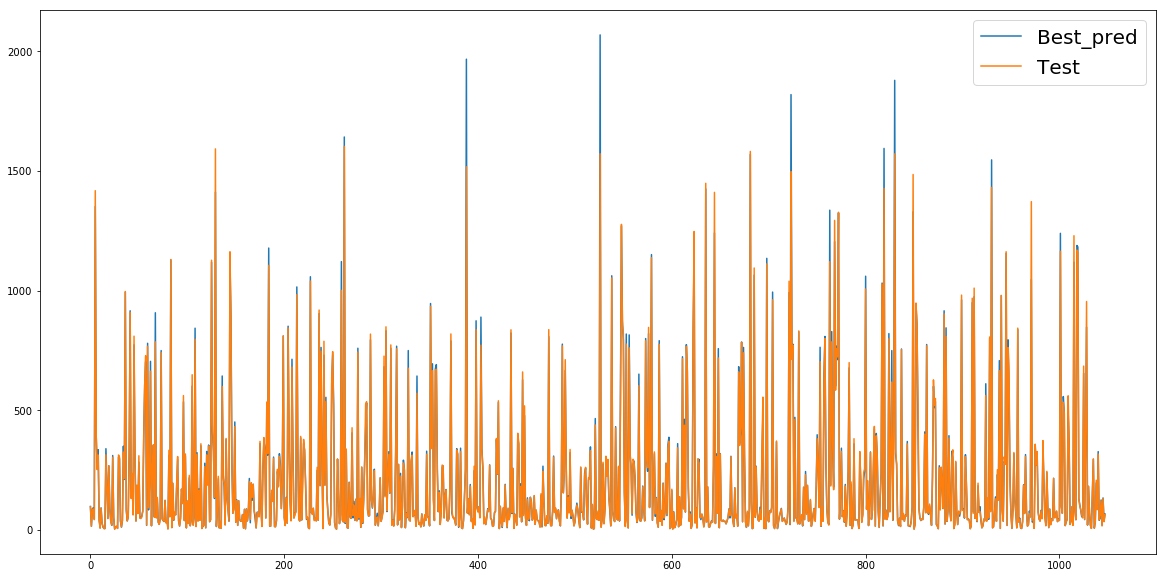

In [208]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(best_pred, label='Best_pred')
plt.plot(y_test, label='Test')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem3. Classification Model : Sentiment Analysis (NLP)
- Use amazon_cells_labelled.tsv data to solve your problem3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 3-1 Load Data
- Load amazon_cells_labelled.tsv and make pandas dataframe.

In [222]:
amazon_review = pd.read_csv('amazon_cells_labelled.tsv', sep='\t')
amazon_review

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


### Problem 3-2 BOW (Bag Of Word)
- Finish your make_review_bow function.
- Make BOW using make_review_bow function.
- Make BOW_df using BOW you made.
    
*hint: Refer to Tutorial code below*

In [232]:
from sklearn.feature_extraction.text import CountVectorizer

In [233]:
#BOW Tutorial

example_doc = [
    'This is the first sentence.',
    'Creating BOW step by step.',
    'This is the last sentence.'
]

print ('# Original text is \n', '\n'.join(example_doc))

vectorizer = CountVectorizer(min_df=0)

vectorizer.fit(example_doc)
x = vectorizer.transform(example_doc)
print ('# Word Vector\n', x)

bow = x.toarray()

bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

# Original text is 
 This is the first sentence.
Creating BOW step by step.
This is the last sentence.
# Word Vector
   (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 7)	2
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1


,bow,by,creating,first,is,last,sentence,step,the,this
0,0,0,0,1,1,0,1,0,1,1
1,1,1,1,0,0,0,0,2,0,0
2,0,0,0,0,1,1,1,0,1,1


In [234]:
"""
@Function
make_review_bow

@Inputs
__
data : data frame
    Amajon review data frame

@Returns
___
vectorizer 
    :<class 'sklearn.feature_extraction.text.CountVectorizer'> 
    
bow 
    : <class 'scipy.sparse.csr.csr_matrix'>
"""

def make_review_bow(data):    
    vectorizer = CountVectorizer(min_df=0)
    vectorizer.fit(data)
    x = vectorizer.transform(data)
    bow = x.toarray()
    ###YOUR CODE HERE###

    return vectorizer, bow

In [235]:
vectorizer, bow = make_review_bow(amazon_review['Review'].values)
bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Problem 3-3 Split Data : Train / Test
- Split your data (1000 reviews) __Train: 800 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [258]:
###YOUR CODE HERE###

def split_data(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x.as_matrix(), y, test_size=0.2, random_state=42)

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_data(bow_df, amazon_review['Sentiment'])

### Problem 3-4 Model by SGDClassifier
- Use SGDClassifer to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html*

In [259]:
from sklearn.linear_model import SGDClassifier

In [260]:
###YOUR CODE HERE###
sgd = SGDClassifier(loss="hinge", penalty="l2")
sgd.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [261]:
sgdScore = sgd.score(x_test,y_test)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.805000


### Problem 3-5 Model by Multinomial Naive Bayes
- Use MultinomialNB to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html *

In [253]:
from sklearn.naive_bayes import MultinomialNB

In [262]:
###YOUR CODE HERE###
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [264]:
nbScore = mnb.score(x_test,y_test)
print ("Model Accuracy: %f" % nbScore)

Model Accuracy: 0.845000


### Problem 3-6 Select the Best Model with 5 fold Cross Validation
- Split your data (1000 reviews) __Train: 600 / Validation: 200 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__
- Choose model you want to use(SGD or NB or both) and give us reason why you choose it.
- Train your model with different parameters using train data and check your model performance by cross validataion score.
- Choose your best model using cross validataion sets and report your test score.

In [265]:
#Split Data
###YOUR CODE HERE###
def split_cross_data(x,y):

    x_train, x_test, y_train, y_test = train_test_split(x.as_matrix(), y, test_size=0.2, random_state=42)
    x_train2,x_cv,y_train2,y_cv = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

    return x_train2,x_cv,x_test,y_train2,y_cv,y_test


x_train,x_cv,x_test,y_train,y_cv,y_test = split_cross_data(bow_df, amazon_review['Sentiment'])

### YOUR ANSWER HERE [reason why you choose that model] ###


우선 가장 큰 이유는 두개를 위에서 CV나누지 않았을경우에 정확도가 MNB의 경우가 SGD보다 좋았으므로 CV를 나눌때에도 더 좋을 것이라 예상이 된다. 따라서 MNB를 선택하였다.

In [266]:
###YOUR CODE HERE###
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [274]:
###YOUR CODE HERE###
i=0.05
while(i<=1):
    mnb = MultinomialNB(alpha=i)
    mnb.fit(x_train,y_train)
    cvscore = mnb.score(x_cv,y_cv)
    print('{:.2f}'.format(i),cvscore)
    i+=0.05


0.05 0.77
0.10 0.775
0.15 0.77
0.20 0.77
0.25 0.77
0.30 0.765
0.35 0.77
0.40 0.775
0.45 0.775
0.50 0.775
0.55 0.775
0.60 0.775
0.65 0.77
0.70 0.77
0.75 0.77
0.80 0.775
0.85 0.78
0.90 0.78
0.95 0.78


In [275]:
mnb = MultinomialNB(alpha=0.85)
mnb.fit(x_train,y_train)
score = mnb.score(x_test,y_test)
print ("Model Accuracy: %f" % score)

Model Accuracy: 0.855000


## Problem4. Clustering Model
- In this problem, you will cluster news article documents after converting them to TF-IDF vectors.
- All results may be different from the example results depending on your choice.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

### Problem 4-1 Pick 3 Categories you want and download

In [2]:
"""

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
 
"""
'''categories = [ 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc'  ]'''
categories = ['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware']

In [3]:
dataset = fetch_20newsgroups(subset='test', categories=categories,
                             shuffle=True, random_state=45)
print("%s" % dataset.description)
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

the 20 newsgroups by date dataset
1175 documents
3 categories


### Problem 4-2 Convert the documents to a tf-idf matrix 
- refer to http://mlwiki.org/index.php/TF-IDF
- You can use sklearn.
- Set your own hyperparams.

In [4]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset.data)
tfidf_matrix

<1175x33753 sparse matrix of type '<class 'numpy.float64'>'
	with 166645 stored elements in Compressed Sparse Row format>

### Problem 4-3 Cluster the documents using K-means
- You can use sklearn
- Set your own hyperparams

In [5]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters, random_state=0).fit(tfidf_matrix)
#TODO
clusters = km.labels_.tolist()
print(clusters[:10])

[2, 0, 0, 0, 2, 2, 2, 0, 0, 0]


### Problem 4-4 Visualize document clusters
- You can use sklearn
- It may take a long time to compile

In [6]:
#USE THIS -DO NOT CHANGE-
dist = 1 - cosine_similarity(tfidf_matrix)
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}
cluster_names = categories

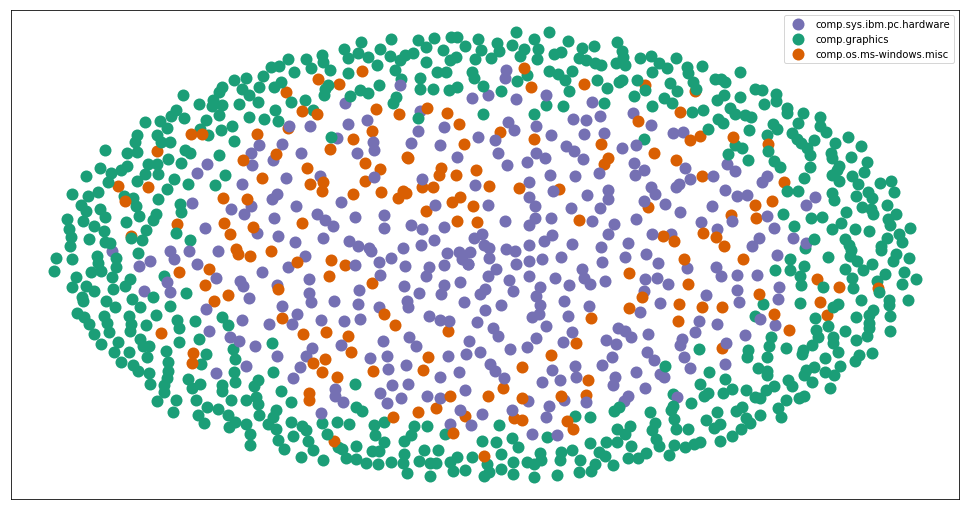

In [15]:
def visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors,ln):
    %matplotlib inline 
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
    name=df['label'].tolist()
    groupx=df['x'].tolist()
    groupy=df['y'].tolist()
    groups=zip(name,groupx,groupy)
    fig, ax = plt.subplots(figsize=(17, 9))
    ax.margins(0.05) 
    for name, groupx,groupy in groups:
        ax.plot(groupx, groupy, marker='o', linestyle='', ms=12, 
                label= cluster_names[name] if name not in ln else '', 
                color= cluster_colors[name], 
                mec='none')
        if name not in ln:
            ln.append(name)
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         
            which='both',     
            left='off',     
            top='off',      
            labelleft='off')
    ax.legend(numpoints=1) 
    plt.show() 

visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors,[])
